<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/Perrin_Champane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O perrin.csv https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2024-07-09 11:37:36--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin’

perrin              100%[===================>]   1.56K  --.-KB/s    in 0s      

2024-07-09 11:37:36 (19.9 MB/s) - ‘perrin’ saved [1598/1598]

--2024-07-09 11:37:38--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin.csv’

perrin.csv          100%[============

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import itertools

In [ ]:
df = pd.read_csv("perrin.csv", index_col = 'Month', parse_dates=True)
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [ ]:
df.index.freq = 'MS'

In [ ]:
df.isna().sum()

Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [ ]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Perrin'}, inplace=True)

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Perrin    0
dtype: int64

<Axes: xlabel='Month'>

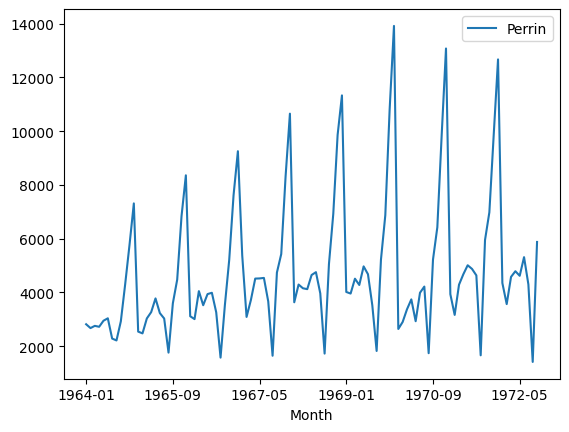

In [ ]:
df.plot()

<Axes: xlabel='Month'>

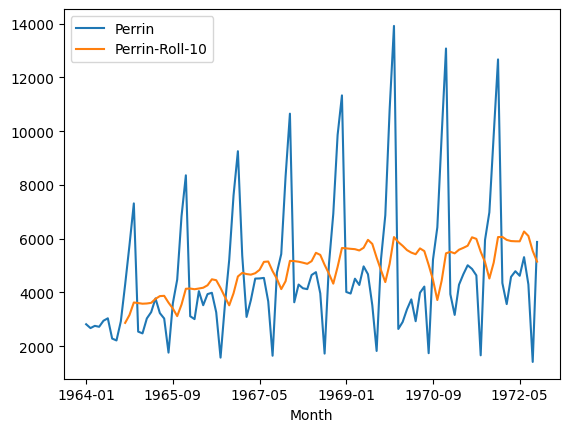

In [ ]:
# Finding moving averages of this data.
df['Perrin-Roll-10'] = df['Perrin'].rolling(10).mean()
df.plot()

<Axes: xlabel='Month'>

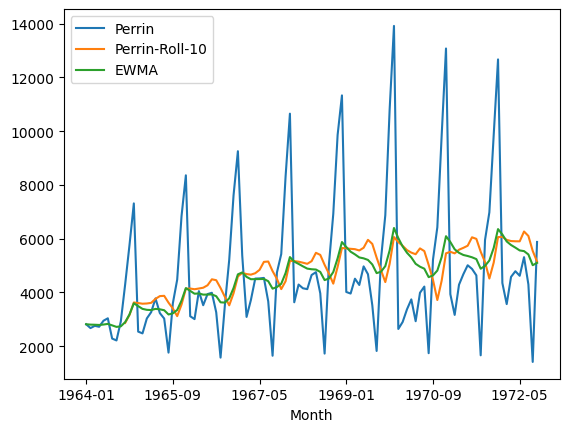

In [ ]:
df['EWMA'] = df['Perrin'].ewm(alpha=0.1, adjust=False).mean()
df.plot()

In [ ]:
# Dividing into train and test giving only 20% to test and rest to train
train_size = int(len(df)*0.8)
df_train = df['Perrin'][:train_size]
df_test = df['Perrin'][train_size:]

In [ ]:
train_idx = df.index <= df_train.index[-1]
test_idx = df.index > df_train.index[-1]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ExponentialSmoothing()

In [ ]:
initialization_method = ['estimated', 'heuristic', 'legacy-heuristic']
trend = ['add', 'mul']
seasonal = ['add', 'mul']

In [ ]:
all_possible_tuples = list(itertools.product(initialization_method, trend, seasonal))

In [ ]:
score = float('inf')

In [ ]:
for x in all_possible_tuples:
  hw = ExponentialSmoothing(df_train, initialization_method=x[0], trend=x[1], seasonal=x[2], seasonal_periods=12)
  model = hw.fit()
  # Now I want to find train and test loss using r2 square
  y_pred = model.predict(start=df_train.index[0], end=df_train.index[-1])
  train_loss = r2_score(df_train, y_pred)
  y_pred = model.predict(start=df_test.index[0], end=df_test.index[-1])
  test_loss = r2_score(df_test, y_pred)
  print("Training loss is ", train_loss)
  print("Testing loss is ", test_loss)
  if test_loss < score:
    score = test_loss
    best_params = x

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training loss is  0.9205751144231377
Testing loss is  0.8868384241244951
Training loss is  0.9403195558728707
Testing loss is  0.961780019261027


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training loss is  0.9180214323548154
Testing loss is  0.823843246722569
Training loss is  0.9115959089616534
Testing loss is  0.5038398899223618
Training loss is  0.9198307623942048
Testing loss is  0.9036561954921687
Training loss is  0.9400073081653925
Testing loss is  0.9618334953822332


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training loss is  0.9182971210288386
Testing loss is  0.7587546978715359
Training loss is  0.9410565294064777
Testing loss is  0.9593844335404493


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training loss is  0.9235746119473882
Testing loss is  0.7754485861729725
Training loss is  0.9395913378364906
Testing loss is  0.9567061960253982


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training loss is  0.9222467492726842
Testing loss is  0.700260020533811
Training loss is  0.9401657396844058
Testing loss is  0.952665647394905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
best_params

('estimated', 'mul', 'mul')

In [ ]:
hw_optimized = ExponentialSmoothing(df_train, initialization_method=best_params[0], trend=best_params[1], seasonal=best_params[2])
res = hw_optimized.fit()
y_pred = res.forecast(len(df_test))
score = r2_score(df_test, y_pred)
score

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.5038398899223618

<Axes: xlabel='Month'>

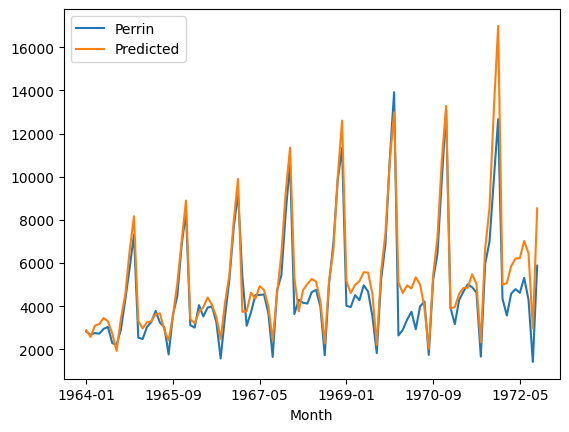

In [ ]:
df.loc[train_idx, 'Predicted'] = res.fittedvalues
df.loc[test_idx, 'Predicted'] = res.forecast(len(df_test))
df[['Perrin', 'Predicted']].plot()

In [ ]:
df['Perrin'].describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Perrin, dtype: float64

In [ ]:
df_test['Perrin']

NameError: name 'df_test' is not defined